In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split


from sklearn.multiclass import OneVsOneClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv ('/content/Diseases_Symptoms.csv')

In [3]:
data.shape
data.info()
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Code        400 non-null    int64 
 1   Name        400 non-null    object
 2   Symptoms    400 non-null    object
 3   Treatments  399 non-null    object
dtypes: int64(1), object(3)
memory usage: 12.6+ KB


0

<Axes: ylabel='Frequency'>

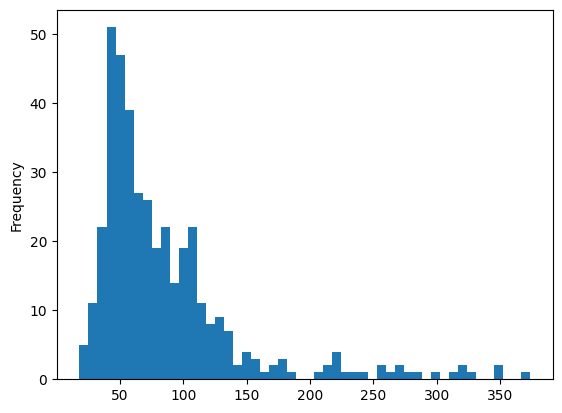

In [4]:
data['Symptoms'].str.len().plot.hist(bins=50)

In [5]:
data.head()

,Code,Name,Symptoms,Treatments
0,1,Panic disorder,"Palpitations, Sweating, Trembling, Shortness o...","Antidepressant medications, Cognitive Behavior..."
1,2,Vocal cord polyp,"Hoarseness, Vocal Changes, Vocal Fatigue","Voice Rest, Speech Therapy, Surgical Removal"
2,3,Turner syndrome,"Short stature, Gonadal dysgenesis, Webbed neck...","Growth hormone therapy, Estrogen replacement t..."
3,4,Cryptorchidism,"Absence or undescended testicle(s), empty scro...",Observation and monitoring (in cases of mild o...
4,5,Ethylene glycol poisoning-1,"Nausea, vomiting, abdominal pain, General mala...","Supportive Measures, Gastric Decontamination, ..."


In [6]:
data.tail()

,Code,Name,Symptoms,Treatments
395,396,Urinary Stones (Kidney Stones),"Severe abdominal or back pain, blood in urine,...","Pain management, increased fluid intake, medic..."
396,397,Osteoporosis,"Fragile bones, loss of height over time, back ...","Calcium and vitamin D supplements, regular exe..."
397,398,Rheumatoid Arthritis,"Joint pain, stiffness, swelling, fatigue, loss...",Medications (nonsteroidal anti-inflammatory dr...
398,399,Type 1 Diabetes,"Frequent urination, Increased thirst, Weight loss","Insulin therapy, Blood sugar monitoring, Healt..."
399,400,Type 2 Diabetes,"Fatigue, Increased hunger, Slow healing of wounds","Oral medications, Insulin therapy (in some cas..."


In [7]:
type(data['Treatments'].iloc[0])

str

In [8]:
import ast


In [9]:
data['Treatments'].iloc[0]

'Antidepressant medications, Cognitive Behavioral Therapy, Relaxation Techniques'

In [10]:
# prompt: make treatment column string into list form

import ast

def convert_treatments(treatments_string):
  try:
    treatments_list = ast.literal_eval(treatments_string)
  except (SyntaxError, ValueError):
    treatments_list = [treatments_string]
  return treatments_list

data['Treatments'] = data['Treatments'].apply(convert_treatments)


In [13]:
data.head()

,Code,Name,Symptoms,Treatments
0,1,Panic disorder,"Palpitations, Sweating, Trembling, Shortness o...","[Antidepressant medications, Cognitive Behavio..."
1,2,Vocal cord polyp,"Hoarseness, Vocal Changes, Vocal Fatigue","[Voice Rest, Speech Therapy, Surgical Removal]"
2,3,Turner syndrome,"Short stature, Gonadal dysgenesis, Webbed neck...","[Growth hormone therapy, Estrogen replacement ..."
3,4,Cryptorchidism,"Absence or undescended testicle(s), empty scro...",[Observation and monitoring (in cases of mild ...
4,5,Ethylene glycol poisoning-1,"Nausea, vomiting, abdominal pain, General mala...","[Supportive Measures, Gastric Decontamination,..."


In [15]:
 y = data['Treatments']
 y

0      [Antidepressant medications, Cognitive Behavio...
1         [Voice Rest, Speech Therapy, Surgical Removal]
2      [Growth hormone therapy, Estrogen replacement ...
3      [Observation and monitoring (in cases of mild ...
4      [Supportive Measures, Gastric Decontamination,...
                             ...                        
395    [Pain management, increased fluid intake, medi...
396    [Calcium and vitamin D supplements, regular ex...
397    [Medications (nonsteroidal anti-inflammatory d...
398    [Insulin therapy, Blood sugar monitoring, Heal...
399    [Oral medications, Insulin therapy (in some ca...
Name: Treatments, Length: 400, dtype: object

In [16]:
multilabel = MultiLabelBinarizer()


In [17]:
data['Treatments'].apply(type).value_counts()
data['Treatments'] = data['Treatments'].apply(str)
y = multilabel.fit_transform(data['Treatments'])

y

array([[1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 0]])

In [18]:
multilabel.classes_

array([' ', '"', '&', "'", '(', ')', ',', '-', '.', '1', '2', '3', '6',
       '9', ':', ';', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K',
       'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'X', '[',
       ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
       'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y',
       'z'], dtype=object)

In [19]:
pd.DataFrame(y, columns=multilabel.classes_)

,,"""",&,',(,),",",-,.,1,...,q,r,s,t,u,v,w,x,y,z
0,1,0,0,1,0,0,1,0,0,0,...,1,1,1,1,1,1,0,1,1,0
1,1,0,0,1,0,0,1,0,0,0,...,0,1,1,1,1,1,0,0,1,0
2,1,0,0,1,0,0,1,0,0,0,...,0,1,1,1,1,1,1,0,1,0
3,1,0,0,1,1,1,1,1,0,1,...,0,1,1,1,1,1,1,1,1,0
4,1,0,0,1,0,0,1,0,0,0,...,0,1,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,0,0,1,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,1,0
396,1,0,0,1,0,0,1,0,0,0,...,0,1,1,1,1,1,1,1,0,0
397,1,0,0,1,1,1,1,1,0,0,...,0,1,1,1,1,0,0,1,1,0
398,1,0,0,1,0,0,1,0,0,0,...,0,1,1,1,1,0,0,1,1,0


In [20]:
tfidf = TfidfVectorizer(analyzer='word', max_features= 1000)
X = tfidf.fit_transform(data['Symptoms'])
X

<400x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 4366 stored elements in Compressed Sparse Row format>

In [21]:
tfidf.vocabulary_

{'palpitations': 620,
 'sweating': 852,
 'trembling': 906,
 'shortness': 772,
 'of': 589,
 'breath': 102,
 'fear': 317,
 'losing': 507,
 'control': 178,
 'dizziness': 247,
 'hoarseness': 416,
 'vocal': 963,
 'changes': 128,
 'fatigue': 315,
 'short': 771,
 'stature': 822,
 'gonadal': 376,
 'dysgenesis': 263,
 'webbed': 975,
 'neck': 562,
 'lymphedema': 515,
 'absence': 7,
 'or': 600,
 'undescended': 929,
 'testicle': 872,
 'empty': 275,
 'scrotum': 752,
 'smaller': 792,
 'underdeveloped': 925,
 'inguinal': 451,
 'hernia': 412,
 'abnormal': 3,
 'positioning': 661,
 'the': 877,
 'higher': 414,
 'in': 436,
 'groin': 381,
 'area': 41,
 'nausea': 559,
 'vomiting': 965,
 'abdominal': 2,
 'pain': 614,
 'general': 368,
 'malaise': 518,
 'weakness': 974,
 'increased': 443,
 'thirst': 881,
 'frequent': 354,
 'urination': 944,
 'metabolic': 533,
 'acidosis': 14,
 'apid': 38,
 'breathing': 103,
 'rapid': 690,
 'heart': 403,
 'rate': 693,
 'confusion': 165,
 'headache': 397,
 'seizures': 756,
 'dec

In [22]:
X.shape, y.shape

((400, 1000), (400, 66))

In [23]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

In [24]:
data.dropna(subset=['Symptoms'], inplace=True)


In [25]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)



In [26]:
tfidf = TfidfVectorizer(analyzer='word', max_features=1000)
X = tfidf.fit_transform(data['Symptoms'])
y = data['Treatments'].values


# **Build** **Model**

In [27]:

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

sgd = SGDClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()
dtc = DecisionTreeClassifier()


In [28]:
def j_score(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    jaccard = 0.0
    for i in range(num_classes):
        true_positives = np.sum(np.logical_and(y_true == i, y_pred == i))
        false_positives = np.sum(np.logical_and(y_true != i, y_pred == i))
        false_negatives = np.sum(np.logical_and(y_true == i, y_pred != i))
        jaccard += true_positives / (true_positives + false_positives + false_negatives)
    return jaccard / num_classes * 100


In [29]:
def j_score(y_true, y_pred):
    jaccard = np.minimum(y_true, y_pred).sum(axis = 1)/np.maximum(y_true,y_pred).sum(axis = 1)
    return jaccard.mean()*100

def print_score(y_pred,clf):
  print("Clf:",clf.__class__.__name__)
  print('Jacard score: {}'.format(j_score(y_test,y_pred)))
  print('----')

In [30]:
from sklearn.multiclass import OneVsRestClassifier

lr = LogisticRegression(penalty='l2') # Change the penalty parameter to a valid value

for classifier in [sgd, lr, svc, dtc]:
  clf = OneVsRestClassifier(classifier)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print_score(y_pred,classifier)



Clf: SGDClassifier
Jacard score: 75.17426795748118
----
Clf: LogisticRegression
Jacard score: 80.03313494906793
----
Clf: LinearSVC
Jacard score: 77.98346164155885
----
Clf: DecisionTreeClassifier
Jacard score: 72.87018565901859
----


In [35]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import jaccard_score, classification_report


clf = OneVsRestClassifier(lr)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", j_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  80.03313494906793
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00        80
           4       0.64      1.00      0.78        50
           5       0.64      1.00      0.78        50
           6       0.96      1.00      0.98        77
           7       0.00      0.00      0.00        24
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         1
          16       0.00     